In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import time
import glob
import numpy as np
from h5py import File
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from scipy import interpolate

In [3]:
def linkDirectory(path, name=''):
    '''Make files available in working directory with recursive symbolic links'''
    # Check for recursiveness
    if isInDirectory(os.getcwd(), path):
        print(name + ' directory is subdirectory of working directory! runOPAL cannot handle this.. bye!')
        sys.exit()
    # lndir and if fails try cp
    if os.system('lndir '+path) != 0:
        print("lndir failed (possibly doesn't exist on this system), using cp -rs... \n"),
        if os.listdir(path):
            os.system('cp -rs '+path+'/* .')

def isInDirectory(filepath, directory):
    # From https://stackoverflow.com/questions/3812849/how-to-check-whether-a-directory-is-a-sub-directory-of-another-directory
    ''' Check if filepath is inside directory '''
    return os.path.realpath(filepath).startswith(os.path.realpath(directory) + os.sep)


In [4]:
def parse_stat(filename, names = ['t', 's','nPart','charge','energy','rms_x', 'rms_y', 'rms_s', \
                                 'rms_px', 'rms_py', 'rms_ps', 'emit_x', 'emit_y', 'emit_s', 'mean_x', \
                                 'mean_y', 'mean_s', 'ref_x', 'ref_y', 'ref_z', 'ref_px', 'ref_py', 'ref_pz', \
                                 'max_x', 'max_y', 'max_s', 'xpx', 'ypy', 'zpz', 'Dx', 'DDx', 'Dy', 'DDy', \
                                 'Bx_ref', 'By_ref', 'Bz_ref', 'Ex_ref', 'Ey_ref', 'Ez_ref', 'dE', 'dt', 'partsOutside',\
                                 'DebyeLength', 'plasmaParameter', 'temperature', 'rmsDensity']):
    dist = {}
    data = np.loadtxt(filename, skiprows=303)
    for i,name in enumerate(names):
        dist[name] = data[:,i]
        
    print('get better parser from nicole')
    return dist

In [6]:
pwd

'/sdf/data/ad/ard/u/paris/Cathode_shaping'

get better parser from nicole
emit_x = 0.54 um
rms_x = 0.16 mm
rms_s = 1.03 mm
energy = 96.55 MeV


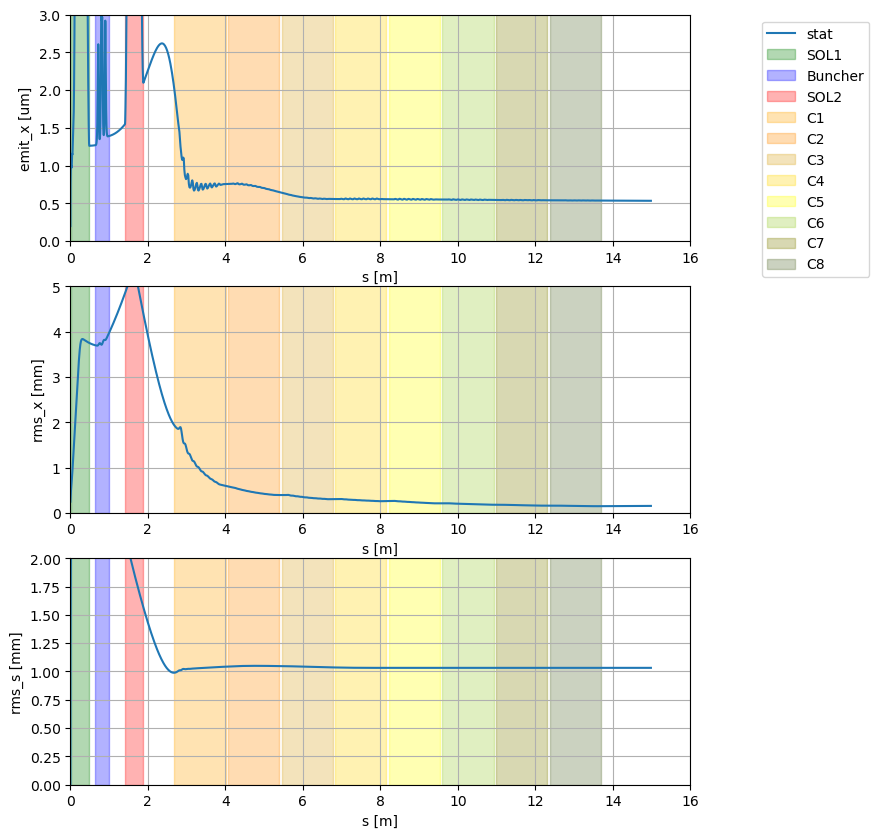

In [7]:
stat = parse_stat('benchmark_sim0/sc_inj.stat')

xmeter = 16

#fig, ax = plt.subplots(figsize = (12,5))
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (8,10))
ax[0].plot(stat['s'], stat['emit_x']*1e6, label = 'stat')

ax[0].fill_between([0.00653,0.48653], 0,100, color='green', alpha=0.3, label = 'SOL1')
ax[0].fill_between([0.6300495,0.9881825], 0,100, color='blue', alpha=0.3, label = 'Buncher')
ax[0].fill_between([1.40581,1.88581], 0,100, color='red', alpha=0.3, label = 'SOL2')
ax[0].fill_between([2.6833989, 4.0021969], 0,100, color='orange', alpha=0.3, label = 'C1')
ax[0].fill_between([4.0669989, 5.3857969], 0,100, color='darkorange', alpha=0.3, label = 'C2')
ax[0].fill_between([5.4505989, 6.7693969], 0,100, color='goldenrod', alpha=0.3, label = 'C3')
ax[0].fill_between([6.8341989, 8.1529969], 0,100, color='gold', alpha=0.3, label = 'C4')
ax[0].fill_between([8.2177989, 9.5365969], 0,100, color='yellow', alpha=0.3, label = 'C5')
ax[0].fill_between([9.6013989, 10.9201969], 0,100, color='yellowgreen', alpha=0.3, label = 'C6')
ax[0].fill_between([10.9849989, 12.3037969], 0,100, color='olive', alpha=0.3, label = 'C7')
ax[0].fill_between([12.3685989, 13.6873969], 0,100, color='darkolivegreen', alpha=0.3, label = 'C8')
ax[0].set_xlabel('s [m]')

#lines_str = [str(x) for x in best_sort] + ['SOL1', 'Buncher', 'SOL2', 'C1'] #, 'C2', 'C3', 'C4', \
          #'C5', 'C6', 'C7', 'C8']
ax[0].legend(loc = 1, bbox_to_anchor = [1.3, 1])
                      
#ax.legend( lines_str, loc = 'upper left')
#ax.set_ylabel('emit_x [um]')
ax[0].set_ylabel('emit_x [um]')
ax[0].set_ylim((0,3))
ax[0].set_xlim((0,xmeter)) #

ax[1].plot(stat['s'], stat['rms_x']*1e3, label = 'stat')

ax[1].fill_between([0.00653,0.48653], 0,100, color='green', alpha=0.3, label = 'SOL1')
ax[1].fill_between([0.6300495,0.9881825], 0,100, color='blue', alpha=0.3, label = 'Buncher')
ax[1].fill_between([1.40581,1.88581], 0,100, color='red', alpha=0.3, label = 'SOL2')
ax[1].fill_between([2.6833989, 4.0021969], 0,100, color='orange', alpha=0.3, label = 'C1')
ax[1].fill_between([4.0669989, 5.3857969], 0,100, color='darkorange', alpha=0.3, label = 'C2')
ax[1].fill_between([5.4505989, 6.7693969], 0,100, color='goldenrod', alpha=0.3, label = 'C3')
ax[1].fill_between([6.8341989, 8.1529969], 0,100, color='gold', alpha=0.3, label = 'C4')
ax[1].fill_between([8.2177989, 9.5365969], 0,100, color='yellow', alpha=0.3, label = 'C5')
ax[1].fill_between([9.6013989, 10.9201969], 0,100, color='yellowgreen', alpha=0.3, label = 'C6')
ax[1].fill_between([10.9849989, 12.3037969], 0,100, color='olive', alpha=0.3, label = 'C7')
ax[1].fill_between([12.3685989, 13.6873969], 0,100, color='darkolivegreen', alpha=0.3, label = 'C8')
ax[1].set_xlabel('s [m]')
ax[1].set_ylim((0,5))
ax[1].set_xlim((0,xmeter))
#ax[1].legend()
ax[1].set_ylabel('rms_x [mm]')

ax[2].plot(stat['s'], stat['rms_s']*1e3, label = 'stat')

ax[2].fill_between([0.00653,0.48653], 0,100, color='green', alpha=0.3, label = 'SOL1')
ax[2].fill_between([0.6300495,0.9881825], 0,100, color='blue', alpha=0.3, label = 'Buncher')
ax[2].fill_between([1.40581,1.88581], 0,100, color='red', alpha=0.3, label = 'SOL2')
ax[2].fill_between([2.6833989, 4.0021969], 0,100, color='orange', alpha=0.3, label = 'C1')
ax[2].fill_between([4.0669989, 5.3857969], 0,100, color='darkorange', alpha=0.3, label = 'C2')
ax[2].fill_between([5.4505989, 6.7693969], 0,100, color='goldenrod', alpha=0.3, label = 'C3')
ax[2].fill_between([6.8341989, 8.1529969], 0,100, color='gold', alpha=0.3, label = 'C4')
ax[2].fill_between([8.2177989, 9.5365969], 0,100, color='yellow', alpha=0.3, label = 'C5')
ax[2].fill_between([9.6013989, 10.9201969], 0,100, color='yellowgreen', alpha=0.3, label = 'C6')
ax[2].fill_between([10.9849989, 12.3037969], 0,100, color='olive', alpha=0.3, label = 'C7')
ax[2].fill_between([12.3685989, 13.6873969], 0,100, color='darkolivegreen', alpha=0.3, label = 'C8')
ax[2].set_xlabel('s [m]')
ax[2].set_xlabel('s [m]')
ax[2].set_ylim((0,2))
ax[2].set_xlim((0,xmeter))
#ax.legend()
ax[2].set_ylabel('rms_s [mm]')

ax[0].grid()
ax[1].grid()
ax[2].grid()

print('emit_x = %1.2f um' %(stat['emit_x'][-1]*1e6))
print('rms_x = %1.2f mm' %(stat['rms_x'][-1]*1e3))
print('rms_s = %1.2f mm' %(stat['rms_s'][-1]*1e3))
print('energy = %1.2f MeV' %(stat['energy'][-1]))

<function matplotlib.pyplot.legend(*args, **kwargs)>

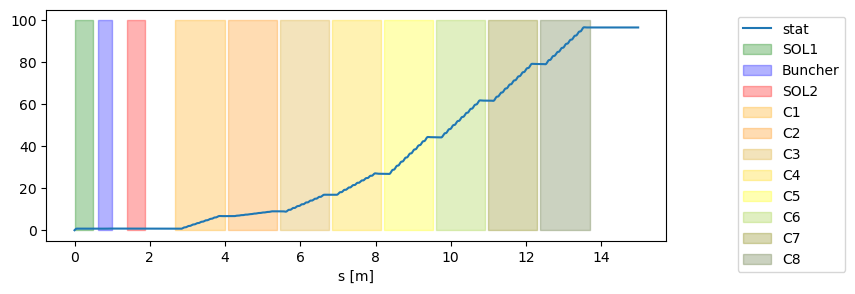

In [9]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,3))
ax = [ax]
ax[0].plot(stat['s'], stat['energy'], label = 'stat')

ax[0].fill_between([0.00653,0.48653], 0,100, color='green', alpha=0.3, label = 'SOL1')
ax[0].fill_between([0.6300495,0.9881825], 0,100, color='blue', alpha=0.3, label = 'Buncher')
ax[0].fill_between([1.40581,1.88581], 0,100, color='red', alpha=0.3, label = 'SOL2')
ax[0].fill_between([2.6833989, 4.0021969], 0,100, color='orange', alpha=0.3, label = 'C1')
ax[0].fill_between([4.0669989, 5.3857969], 0,100, color='darkorange', alpha=0.3, label = 'C2')
ax[0].fill_between([5.4505989, 6.7693969], 0,100, color='goldenrod', alpha=0.3, label = 'C3')
ax[0].fill_between([6.8341989, 8.1529969], 0,100, color='gold', alpha=0.3, label = 'C4')
ax[0].fill_between([8.2177989, 9.5365969], 0,100, color='yellow', alpha=0.3, label = 'C5')
ax[0].fill_between([9.6013989, 10.9201969], 0,100, color='yellowgreen', alpha=0.3, label = 'C6')
ax[0].fill_between([10.9849989, 12.3037969], 0,100, color='olive', alpha=0.3, label = 'C7')
ax[0].fill_between([12.3685989, 13.6873969], 0,100, color='darkolivegreen', alpha=0.3, label = 'C8')
ax[0].set_xlabel('s [m]')

#lines_str = [str(x) for x in best_sort] + ['SOL1', 'Buncher', 'SOL2', 'C1'] #, 'C2', 'C3', 'C4', \
          #'C5', 'C6', 'C7', 'C8']
ax[0].legend(loc = 1, bbox_to_anchor = [1.3, 1])
plt.legend

In [19]:
stat['energy'][30:40]

array([0.00875238, 0.00983423, 0.01102307, 0.01232159, 0.01373093,
       0.01525153, 0.01688278, 0.01862349, 0.020472  , 0.02242664])

In [ ]:
#sol1 starts at 0.00653, 6.5e-3

In [26]:
x = np.argmin((stat['s']-0.0995)**2)
x

118

In [28]:
stat['s'][x], stat['energy'][x],stat['s'][x-1], stat['energy'][x-1]

(0.09973510196374617,
 0.755777445957287,
 0.09836347709325438,
 0.7557751327838941)

In [20]:
#gun len 0.199 centered at 0


In [21]:
0.199/2

0.0995

In [22]:
# Sol1 L = 0.48, ELEMEDGE= 0.24653

In [23]:
0.24653-0.48/2

0.006530000000000008